In [1]:
import pandas as pd
import shapely
from datetime import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('data/pokhara_building_lifespans_by_week.csv')




In [5]:
df.head(2)

,_col0,lifespan,objects
0,2013-07-01,2.124782e+06,256
1,2013-11-04,NaN,1


In [9]:
# Convert the timestamps to timestamps
df['_col0'] = df._col0.apply(pd.Timestamp)
df.set_index('_col0', inplace=True)

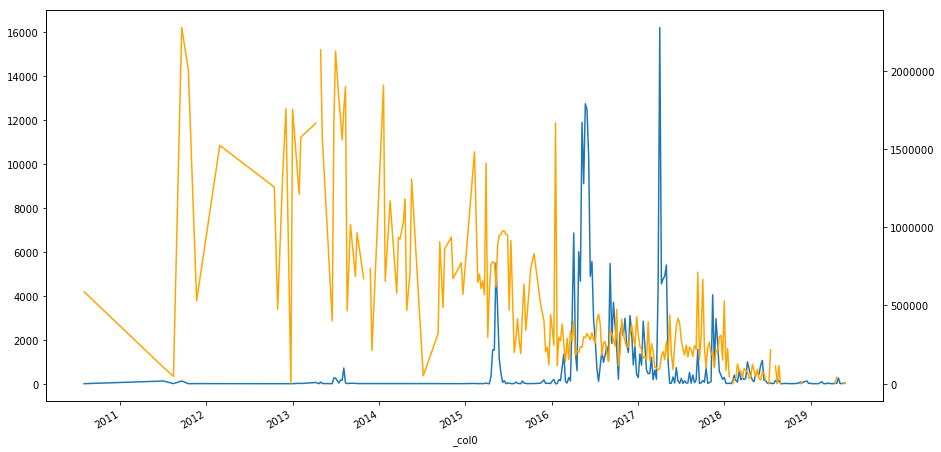

In [17]:
ax = df['objects'].plot(figsize=(15,8))
df['lifespan'].plot(ax=ax.twinx(), color='orange')

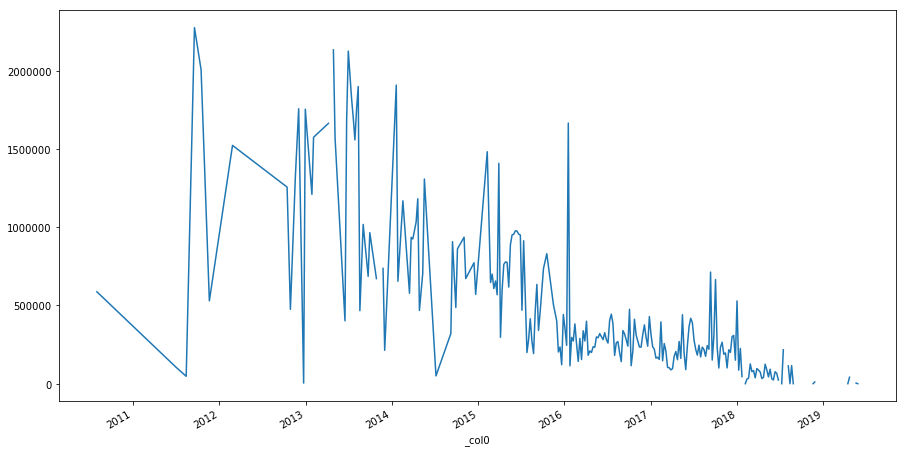

In [18]:
df['lifespan'].plot(figsize=(15,8))

In [51]:
df.sort_values(by='updated',ascending=False)

,id,geom,tags,changeset,updated,valid_until,version,minor_version,id.1,c_tags,uid,user,lifespan
82426,48610206,"POLYGON ((-72.3509532 18.7114646, -72.3510739 ...","{'amenity': 'prison, name', 'prison, name': 'P...",70838219,2019-06-01 15:49:08,2019-06-01 15:49:08,3,0,48610206,"{'amenity': 'prison, name', 'prison, name': 'P...",5875897,Brett McAlpine,0 days
369370,2424756,"MULTILINESTRING ((-72.1882656 18.6566535, -72....","{'ref': 'RN 3, role', 'RN 3, role': 'backward,...",70835391,2019-06-01 13:39:42,2019-06-01 13:39:42,32,16,2424756,"{'ref': 'RN 3, role', 'RN 3, role': 'backward,...",124550,bvivi,0 days
89364,48288616,"LINESTRING (-72.248779 18.618891, -72.2495411 ...","{'operational_status_quality': 'confirmed, pra...",70835391,2019-06-01 13:36:26,2019-06-01 13:36:26,24,0,48288616,"{'operational_status_quality': 'confirmed, pra...",2767479,sisskind,0 days
262298,30029341,"LINESTRING (-72.5851563 18.5303397, -72.585109...","{'haiti:nom': 'None, haiti:type', 'None, haiti...",70831000,2019-06-01 09:04:02,2019-06-01 09:04:02,4,2,30029341,"{'haiti:nom': 'None, haiti:type', 'None, haiti...",2237750,chachafish,0 days
444187,30029247,"LINESTRING (-72.5849824 18.5247868, -72.585115...","{'operational_status_quality': 'confirmed, pra...",70831000,2019-06-01 09:04:02,2019-06-01 09:04:02,19,0,30029247,"{'operational_status_quality': 'confirmed, pra...",483777,mjf87nl,0 days
343716,48420686,"LINESTRING (-72.5851563 18.5303397, -72.585234...","{'source': 'DigitalGlobe, highway', 'DigitalGl...",70831000,2019-06-01 09:04:02,2019-06-01 09:04:02,4,3,48420686,"{'source': 'DigitalGlobe, highway', 'DigitalGl...",3463089,tianov,0 days
57429,48982147,"POLYGON ((-72.1505071 18.6597499, -72.1505043 ...","{'addr:country': 'HT, landuse', 'HT, landuse':...",70818955,2019-05-31 18:32:25,2019-05-31 18:32:25,4,0,48982147,"{'addr:country': 'HT, landuse', 'HT, landuse':...",5981662,carolinegrocha,0 days
295051,48982156,"POLYGON ((-72.1504963 18.6628178, -72.1508036 ...","{'addr:country': 'HT, landuse', 'HT, landuse':...",70818179,2019-05-31 18:06:29,2019-05-31 18:06:29,5,0,48982156,"{'addr:country': 'HT, landuse', 'HT, landuse':...",5325956,ramon matias mella padilla,0 days
146291,48982152,"POLYGON ((-72.1367056 18.6588935, -72.1369202 ...","{'addr:country': 'HT, landuse', 'HT, landuse':...",70817909,2019-05-31 17:58:14,2019-05-31 17:58:14,3,0,48982152,"{'addr:country': 'HT, landuse', 'HT, landuse':...",350864,demon_box,0 days
337529,48982156,"POLYGON ((-72.1504963 18.6628178, -72.1508036 ...","{'addr:country': 'HT, landuse', 'HT, landuse':...",70817212,2019-05-31 17:37:19,2019-05-31 17:37:19,4,0,48982156,"{'addr:country': 'HT, landuse', 'HT, landuse':...",5325956,ramon matias mella padilla,0 days


In [25]:
df.tags.apply(string_to_dict)

0         {'note': 'building outline follows roof outlin...
1         {'source': 'GeoEye, highway', 'GeoEye, highway...
2         {'note': 'HOT TM-cap103 toutes zones residenti...
3         {'natural': 'coastline, source', 'coastline, s...
4         {'haiti:nom': 'None, haiti:type', 'None, haiti...
5         {'source': 'digitalglobe, highway', 'digitalgl...
6         {'haiti:nom': 'Departementale, haiti:type', 'D...
7         {'area': 'yes, orig:location', 'yes, orig:loca...
8         {'addr:country': 'HT, landuse', 'HT, landuse':...
9         {'source:name': 'MINUSTAH GIS and UN Cartograp...
10        {'access': 'private, service', 'private, servi...
11                                      {'building': 'yes'}
12                                      {'building': 'yes'}
13        {'source': 'DigitalGlobe, highway', 'DigitalGl...
14        {'source': 'Google, 2010-01-21, building', 'Go...
15        {'source': 'geoeye, highway', 'geoeye, highway...
16                                   {'h